In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.style.use('ggplot')

https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/preprocessing-and-pipelines?ex=1

> ** part 1. Classification **

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [5]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


Visual EDA 
  - if features are numeric, plot a scatter matrix plot is helpful
  - if features are binary, plot sns.countplot for example is good.
  


/Users/xduan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


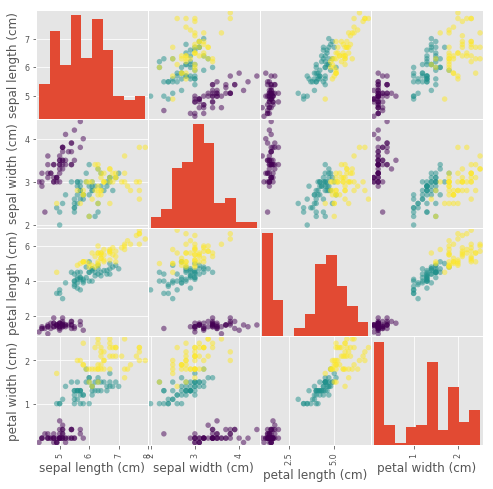

In [9]:
_ = pd.scatter_matrix(df, c = y, figsize = [8, 8], s = 30, marker = 'o')
# c means color by target y
plt.show()

- Simple KNN prediction

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


Note on stratify: 
  - This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

  - For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [14]:
# model setup
knn = KNeighborsClassifier(n_neighbors= 6)

# sample split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2
                  , random_state=42, stratify=y)
# fit
knn.fit(X_train, y_train)

#prediction
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)


In [15]:
print score

0.9666666666666667


- ** Model complexity figure **

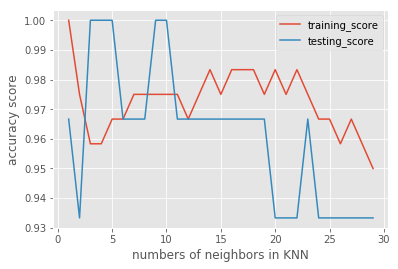

In [21]:
neighbors_lst = [x for x in range(1, 30)]
test_score_lst = []
train_score_lst = []
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

# sample split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2
                      , random_state=42, stratify=y)

for neighbor_num in neighbors_lst:
    knn = KNeighborsClassifier(n_neighbors= neighbor_num)
    
    # fit
    knn.fit(X_train, y_train)

    #prediction
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    train_score = accuracy_score(y_train, y_pred_train)
    train_score_lst.append(train_score)
    
    test_score = accuracy_score(y_test, y_pred_test)
    test_score_lst.append(test_score)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors_lst,train_score_lst, label = 'training_score')
plt.plot(neighbors_lst,test_score_lst, label = 'testing_score')
plt.ylabel('accuracy score')
plt.xlabel('numbers of neighbors in KNN')
plt.legend(loc = 'best')

plt.show()

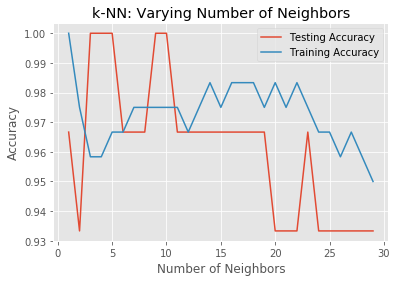

In [24]:
# sample split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2
                      , random_state=42, stratify=y)


# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


> ** part 2: regression **

- 1) Linear regression loss function: sum of square of residual
     -- Ordinary least square (OLS): minimize sum of square of residual

In [30]:
houses = datasets.load_boston()
houses.keys()



['data', 'feature_names', 'DESCR', 'target']

In [32]:
X = houses.data
y = houses.target

boston = pd.DataFrame(X, columns = houses.feature_names)
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [35]:
houses.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

In [36]:
# # Import LinearRegression
# from sklearn.linear_model import LinearRegression 

# # Create the regressor: reg
# reg = LinearRegression()

# # Create the prediction space
# prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# # Fit the model to the data
# reg.fit(X_fertility, y)

# # Compute predictions over the prediction space: y_pred
# y_pred = reg.predict(prediction_space)

# # Print R^2 
# print(reg.score(X_fertility, y))

# # Plot regression line
# plt.plot(prediction_space, y_pred, color='black', linewidth=3)
# plt.show()


- cross validation can prevent model performance depending on how sample split.
  - simple example below


In [37]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]
Average 5-Fold CV Score: 0.350741350933


- regularization: penalize large coefficients. Large coefficients can lead to overfitting.
   - lasso regression: example below
     - Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.
     - Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients.
   - Ridge regression: you took the sum of the squared values of the coefficients multiplied by some alpha ,ou would be computing the L2 norm. Ridge regression should be your first choice.



### regularzation
![title](regularization.png)


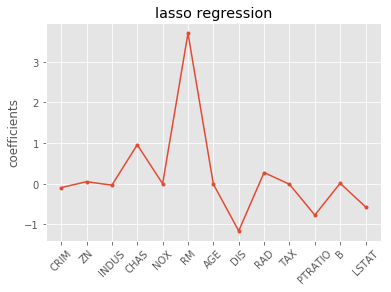

In [45]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)

lasso_coef = lasso.fit(X,y).coef_

names = boston.columns

plt.plot(range(len(names)), lasso_coef, label = 'coeff', marker = '.')
plt.xticks(range(len(names)), names, rotation = 45)
plt.title('lasso regression')
plt.ylabel('coefficients')
plt.show()


In [46]:
def display_plot(cv_scores, cv_scores_std, cv):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(cv)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

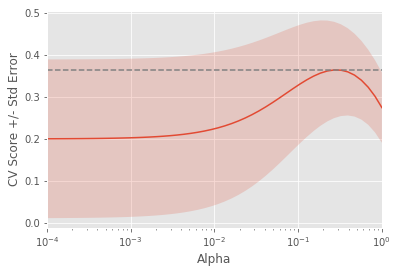

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

cv = 10
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = cv)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std, cv)


 >  ** part 3: evaluation **

#### confusion matrix
![title](confusion_mt.png)

#### metrics from confusion matrix
![title](metrics.png)


#### ROC curve
![title](roc.png)

In [53]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [54]:
# sample split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2
                  , random_state=42, stratify=y)

In [57]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       1.00      0.89      0.94        19
          2       0.90      1.00      0.95        18

avg / total       0.97      0.97      0.97        60



In [66]:
print y_pred[:2]
print y_test[:2]

[1 0]
[1 0]


In [65]:
logreg.predict_proba(X_test)[:2]

array([[1.36589187e-02, 6.50522287e-01, 3.35818795e-01],
       [8.88817724e-01, 1.11135289e-01, 4.69867838e-05]])

In [64]:

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ValueError: Data is not binary and pos_label is not specified

precision-recall curve
- in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

  - Precision=TP/(TP+FP)
  - Recall=TP/(TP+FN)

- ROC curve and roc_auc

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


- hyperparameter tuning
  - gridsearchCV
  - RandomizedSearchCV

- example of gridsearchCV

In [ ]:
# example of GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, cv=5, param_grid=param_grid)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


- example of randomizedSearchCV

In [ ]:
# example of RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions = param_dist, cv= 5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


- ** holdout sample + gridsearchCV **

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid = param_grid, cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


-- a complete example
   - split sample into train and test
   - gridsearch on train dataset
   - final evaluate on holdout sample

In [ ]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid = param_grid, cv = 5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


> ** part 4: preprocessing data **

- 1) get dummies 

In [ ]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = df_region.drop('Region_America', axis = 1)

# Print the new columns of df_region
print(df_region.columns)


- 2) missing values: 
    - missing values can be null, -1, 0. Check real data yourselves.
    - imputation: make an educated guess on missing values.

In [ ]:
#codes for missing value

#change 0 values to null for further imputation
df.insulin.replace(0, np.nan, inplace = True)

#imputation
from sklearn.preprocessing import Imputer
imp = Imputer(missing_value = 'NaN', strategy = 'mean', axis = 0)

In [ ]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

# Create the pipeline: pipeline
pipeline = Pipeline(
    steps
    )
    

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test,y_pred))


- 3) scaling 
     - ways to normalize your data
        - standardizing: substract mean and divide by std
            - centered around 0 and have variance 1
        - min and max scale:
            - min 0 and max 1
        - normalize range from -1 to 1

example to compare standardized with non-standardized

In [ ]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


> Bringing it all together 
  - I: Pipeline for classification
  

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid= parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


- I: Pipeline for regression

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid= parameters, cv = 3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


In [ ]:
## get cooeffienct from gridsearch cv
scaler = gm_cv.best_estimator_.named_steps['scaler']
ridge = gm_cv.best_estimator_.named_steps['ridge']
ridge_coef = ridge.coef_

names = X_final.columns

plt.subplots(figsize=(30, 10))
plt.plot(range(len(names)), ridge_coef, label = 'coeff', marker = '.')
plt.xticks(range(len(names)), names, rotation = 40)
plt.title('ridge regression')
plt.ylabel('coefficients')
plt.grid()
plt.show()

- feature selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import f_regression, mutual_info_regression


# Import the necessary modules
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split


start = time()


# feature selection using lassoCV
clf = LassoCV(cv=5)
sfm = SelectFromModel(clf)

# using anova for feature selection
anova_filter = SelectKBest(f_regression)
mutual = SelectKBest(mutual_info_regression)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('filter', sfm),
#          ('ridge', Ridge())
        ('rf', RandomForestRegressor())
        ]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# # Specify the hyperparameter space
# parameters = {
#              'ridge__alpha':[1e-2, 1, 5, 10, 20, 30, 40]
# }

# Specify the hyperparameter space
parameters = {
#                 'filter__k': [10, 20 ,30],
              'rf__n_estimators':[200, 500, 1000]
#               ,'rf__max_features':['auto','sqrt']
             }

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_refund, test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid= parameters, cv = 5)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
y_pred = gm_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned Alpha: {}".format(gm_cv.best_params_))
print("Tuned R squared: {}".format(r2))
print("Tuned MSE: {}".format(mse))

print("this takes %.2f seconds" %(time()-start))

In [ ]:
regressor = gm_cv.best_estimator_.named_steps['rf']
selector = gm_cv.best_estimator_.named_steps['filter']
print ('after selection, num of feature %d' %selector.get_support().sum())
print ('original feature: %d' %X_final.shape[1])

In [ ]:
zip(selector.get_support(), X_train.columns)